In [18]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dir = "./data/DopantUptake/DopantUptake/Data"
samples = [os.path.join(dir, sample) for sample in os.listdir(dir)]


sample_dfs = {}
for sample in samples:
    sample_name = os.path.basename(sample).split('.')[0]
    sample_dfs[sample_name] = pd.read_csv(sample, sep='\t', skiprows=1, na_values=["Failed"])

def sorter(item):
    if item[0].startswith('Sample'):
        return int(item[0].split(' ')[-1])
    else: return 0

sample_dfs = dict( sorted(sample_dfs.items(), key=sorter) )

In [3]:
sample_dfs.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

In [4]:
sample_dfs['Sample 12']

,Time [s],R2_m9 [ng/cm^2],C1_m [ng/cm^2]
0,0.0000,NaN,NaN
1,1.3259,NaN,NaN
2,2.6424,NaN,NaN
3,3.9720,NaN,NaN
4,5.3007,NaN,NaN
...,...,...,...
4395,1764.2580,749.44,749.82
4396,1764.6506,754.17,751.57
4397,1765.0690,752.55,749.63
4398,1765.5342,751.58,750.93


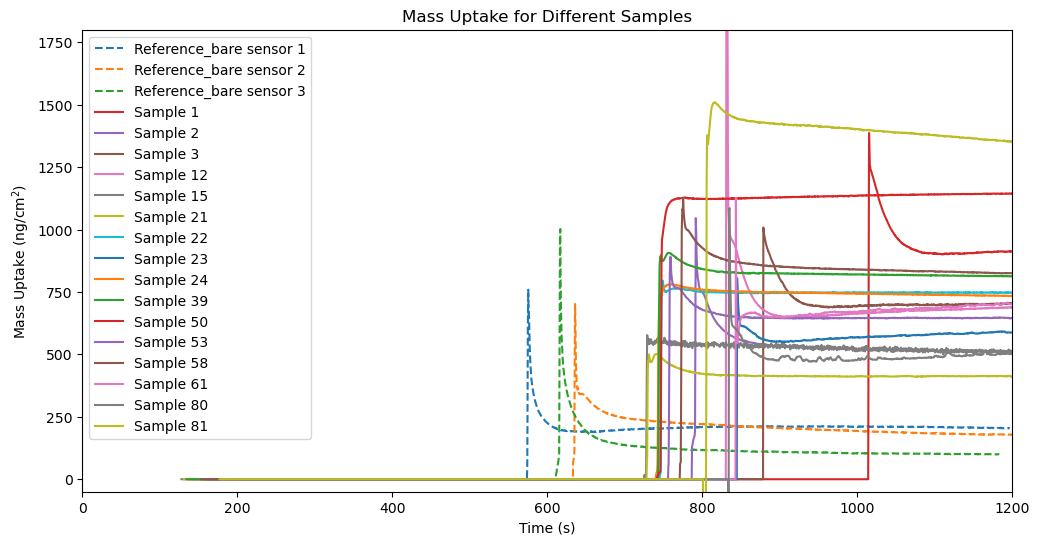

In [19]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake for Different Samples')
plt.xlabel('Time (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in sample_dfs:
    if sample_name.startswith('Sample'): linestyle = '-'
    else: linestyle = '--'
    t = sample_dfs[sample_name]['Time [s]']
    m = sample_dfs[sample_name]['C1_m [ng/cm^2]']
    plt.plot(t, m, label=sample_name, linestyle=linestyle)


plt.xlim(0, 1200)
plt.ylim(-50, 1800)
plt.legend()

In [ ]:
cropped_sample_dfs = {}

cols = ['sample', 'df', 'type']
rows = []

for sample_name in sample_dfs:

    sample_df = sample_dfs[sample_name]
    sample_df = sample_df.dropna()

    t = sample_df['Time [s]']
    m = sample_df['C1_m [ng/cm^2]']
    '''
    m = m0.values[:-1]
    t = t0.values[:-1]
    dm = np.diff(m0)
    dm_av = np.full_like(dm, dm.mean())
    '''
    slope = np.gradient(m, t)

    # df = pd.DataFrame({'m': m, 't': t, 'dm': dm, 'dm_av': dm_av})
    df = pd.DataFrame({'t': t, 'm':m, 'dm/dt': slope})

    idx_max = int( df['dm/dt'].idxmax() )

    df_cropped = df.loc[(idx_max-5):(idx_max+10)]

    t0 = df_cropped.loc[idx_max, 't']
    df_cropped['t shifted'] = df_cropped['t'] - np.full_like(df_cropped['t'], t0)

    df_cropped = df_cropped.reset_index(drop=True)
    
    rows.append( [sample_name, df_cropped, np.NaN] )

    cropped_sample_dfs[sample_name] = df_cropped

cropped_sample_dfs_df = pd.DataFrame(rows, columns=cols)

C:\Users\willi\AppData\Local\Temp\ipykernel_15488\1934545906.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped['t shifted'] = df_cropped['t'] - np.full_like(df_cropped['t'], t0)
C:\Users\willi\AppData\Local\Temp\ipykernel_15488\1934545906.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped['t shifted'] = df_cropped['t'] - np.full_like(df_cropped['t'], t0)
C:\Users\willi\AppData\Local\Temp\ipykernel_15488\1934545906.py:29: SettingWithCopyWarning: 
A value is trying to be set on a co

In [121]:
print(cropped_sample_dfs_df.loc[0,'sample'])
cropped_sample_dfs_df.loc[0, 'df']

Reference_bare sensor 1


,m,t,dm,dm_av,t shifted
0,0.00,572.1574,0.00,0.088947,-2.1891
1,0.00,572.6163,0.00,0.088947,-1.7302
2,0.00,573.0351,0.00,0.088947,-1.3114
3,0.00,573.5192,41.91,0.088947,-0.8273
4,41.91,573.9983,202.30,0.088947,-0.3482
5,244.21,574.3465,371.50,0.088947,0.0000
6,615.71,574.8054,143.10,0.088947,0.4589
7,758.81,575.3740,-110.98,0.088947,1.0275
8,647.83,575.8459,22.02,0.088947,1.4994
9,669.85,576.2321,-80.37,0.088947,1.8856


In [123]:
cropped_sample_dfs.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

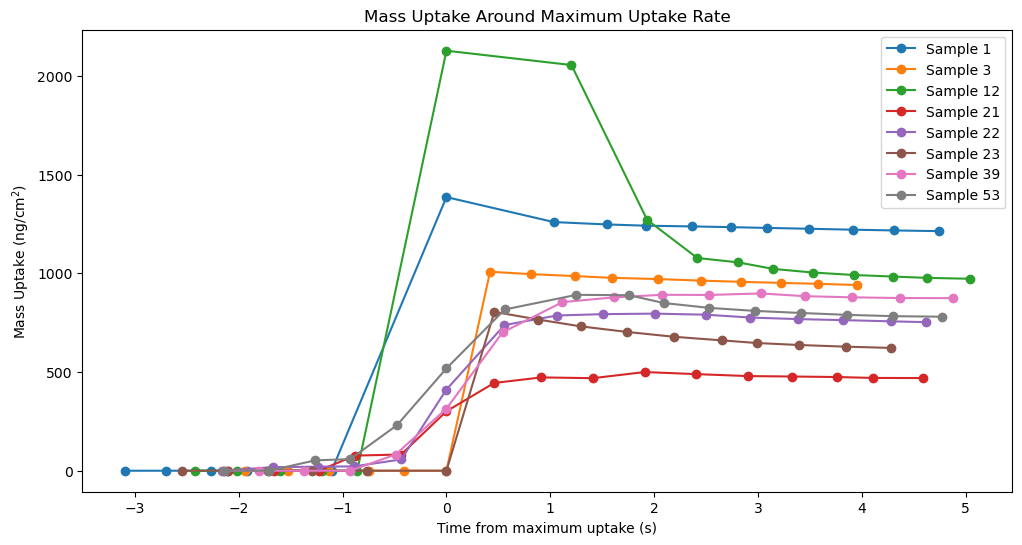

In [150]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake Around Maximum Uptake Rate')
plt.xlabel('Time from maximum uptake (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in list(cropped_sample_dfs.keys())[:15]:
    if sample_name.startswith('Sample'): 
        df_cropped = cropped_sample_dfs[sample_name]
        if df_cropped.loc[0,'m'] < 1:
            plt.plot(df_cropped['t shifted'], df_cropped['m'], marker='o', linestyle='-', label=sample_name)

plt.legend()

In [139]:
cropped_sample_dfs = {}

cols = ['sample', 'df', 'number of points']
rows = []

for sample_name in sample_dfs:

    sample_df = sample_dfs[sample_name]
    sample_df_nona = sample_df.dropna()

    t = sample_df_nona['Time [s]']
    m = sample_df_nona['C1_m [ng/cm^2]']
    slope = np.abs(np.gradient(m, t))
    
    thresh = 0.1*slope.max()

    interesting_idx = np.where(slope > thresh)[0]

    df = pd.DataFrame({'m': m, 't': t, 'slope': slope})

    df_cropped = df.loc[interesting_idx[0]:interesting_idx[-1]]
    
    df_cropped = df_cropped.reset_index(drop=True)

    t0 = df_cropped.loc[0, 't']
    df_cropped['t shifted'] = df_cropped['t'] - np.full_like(df_cropped['t'], t0)
    
    number_of_points = len(interesting_idx)
    rows.append( [sample_name, df_cropped, np.NaN] )

    cropped_sample_dfs[sample_name] = df_cropped

cropped_sample_dfs_df = pd.DataFrame(rows, columns=cols)

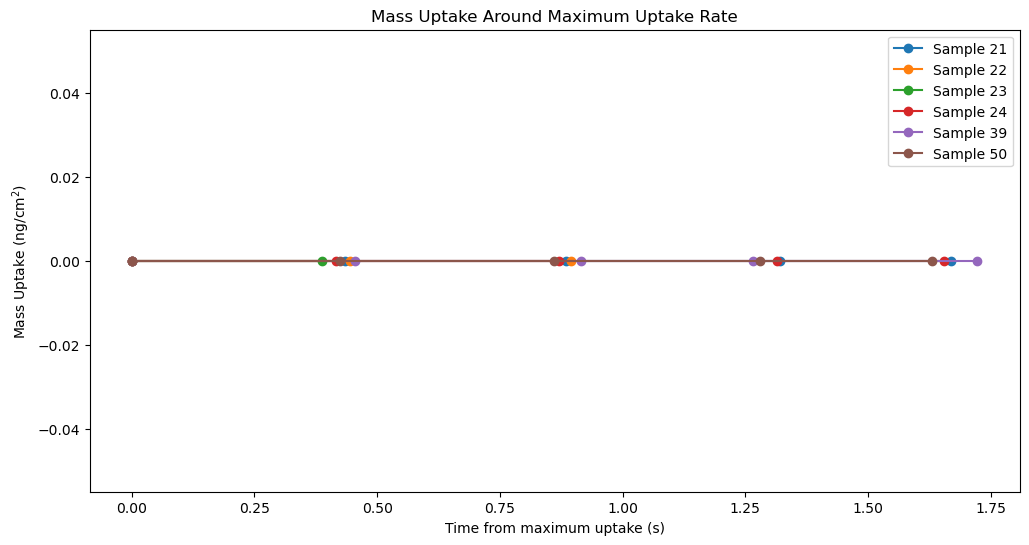

In [142]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake Around Maximum Uptake Rate')
plt.xlabel('Time from maximum uptake (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in list(cropped_sample_dfs.keys())[8:14]:
    if sample_name.startswith('Sample'): 
        df_cropped = cropped_sample_dfs[sample_name]
        if df_cropped.loc[0,'m'] < 1:
            plt.plot(df_cropped['t shifted'], df_cropped['m'], marker='o', linestyle='-', label=sample_name)

plt.legend()